In [39]:
model_9=DecisionTreeClassifier(max_depth=9)
model_9.fit(X_train,y_train)
y_pred=model_9.predict(X_test)
from sklearn.metrics import accuracy_score
score_9=accuracy_score(y_pred,y_test)
y_pred_proba=model_9.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
score_roc_9=roc_auc_score(y_test.values,y_pred_proba[:,1])
score_roc_9
score_9
score_roc

DecisionTreeClassifier(max_depth=9)

0.98614113012292

0.9846666666666667

0.9736722483245008

In [35]:
#网格搜索
#参数调优：应用交叉验证
from  sklearn.model_selection import GridSearchCV
parameters={"max_depth":[1,3,5,7,9]} #树的最大高度
model_2=DecisionTreeClassifier()
grid_search=GridSearchCV(model_2,parameters,scoring="roc_auc",cv=5)
grid_search.fit(X_train,y_train)
#最佳高度
grid_search.best_params_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9]}, scoring='roc_auc')

{'max_depth': 9}

In [34]:
acc_roc=cross_val_score(model,X,y,cv=10,scoring="roc_auc")
acc_roc.mean()

0.9661797931848565

In [33]:
#参数调优 k折交叉验证
from sklearn.model_selection import cross_val_score
acc=cross_val_score(model,X,y,cv=10) #一般10-20次
acc.mean()  #仅一次的情况为97%
acc

0.9523333333333334

array([0.96466667, 0.96866667, 0.95733333, 0.964     , 0.95866667,
       0.95933333, 0.96866667, 0.956     , 0.916     , 0.91      ])

In [31]:
feature=X.columns
importances=model.feature_importances_
#以2维结构表形式
importances_df=pd.DataFrame()
importances_df["特征名称"]=feature
importances_df["重要度"]=importances
importances_df.sort_values("重要度",ascending=False)


,特征名称,重要度
1,满意度,0.598109
5,工龄,0.150866
2,考核得分,0.140074
3,工程数量,0.106387
4,月工时,0.004565
0,工资,0.000000


In [28]:
#判断特征的重要性,
df.columns
model.feature_importances_ #员工比较重视满意度和考核

Index(['工资', '满意度', '考核得分', '工程数量', '月工时', '工龄', '离职'], dtype='object')

array([0.        , 0.59810862, 0.14007392, 0.10638659, 0.00456495,
       0.15086592])

In [25]:
from sklearn.metrics import roc_auc_score
score_roc=roc_auc_score(y_test,y_pred_proba[:,1])
score_roc

0.9736722483245008

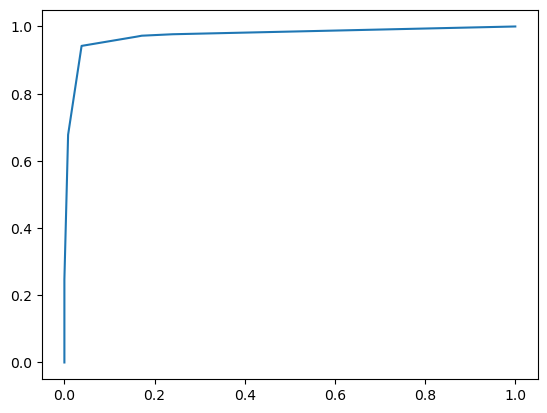

In [23]:
plt.plot(fpr,tpr)
plt.show()

In [22]:
#模型预测效果评估
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])
a_roc=pd.DataFrame()
a_roc["阈值"]=list(thres)
a_roc["警报率"]=list(fpr)
a_roc["命中率"]=list(tpr)
a_roc

,阈值,警报率,命中率
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.247110
2,0.945946,0.008232,0.677746
3,0.713994,0.038128,0.942197
4,0.077168,0.159879,0.969653
5,0.059406,0.171577,0.972543
6,0.045763,0.240035,0.976879
7,0.014739,1.000000,1.000000


In [21]:
#概率
y_pred_proba=model.predict_proba(X_test)
b=pd.DataFrame(y_pred_proba,columns=["不离职概率","离职概率"])
b.head()

,不离职概率,离职概率
0,0.985261,0.014739
1,0.985261,0.014739
2,0.286006,0.713994
3,0.985261,0.014739
4,0.922832,0.077168


In [18]:
#查看整体的预测效果 准确率
model.score(X_test,y_test)
model.predict_proba(X_test)

0.9573333333333334

array([[0.98526077, 0.01473923],
       [0.98526077, 0.01473923],
       [0.28600613, 0.71399387],
       ...,
       [0.98526077, 0.01473923],
       [0.05405405, 0.94594595],
       [0.98526077, 0.01473923]])

In [19]:
#如何返回离职的概率 ，通过DataFrame进行对比
a = pd.DataFrame()
a['预测值']=list(y_pred)
a['实际值']=list(y_test)
a.head()
a['预测值'].mean()
a['实际值'].mean()


,预测值,实际值
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


0.24666666666666667

0.23066666666666666

In [12]:
#模型的预测和评估
#直接预测是否离职
y_pred=model.predict(X_test)
y_pred.shape
y_pred

(3000,)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [10]:
#模型的训练和搭建
from sklearn.tree import DecisionTreeClassifier
#实例化,限制高度为3；
model=DecisionTreeClassifier(max_depth=3,random_state=123)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [9]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [15]:
X_train.shape
X_test.shape
y_train.shape


(12000, 6)

(3000, 6)

(12000,)

In [8]:
# 提取特征变量和目标变量
X=df.drop(columns="离职")
y=df["离职"]

In [7]:
df=df.replace({"工资":{"低":0,"中":1,"高":2}})
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,0,3.8,0.53,2,157,3,1
1,1,8.0,0.86,5,262,6,1
2,1,1.1,0.88,7,272,4,1
3,0,7.2,0.87,5,223,5,1
4,0,3.7,0.52,2,159,3,1


In [8]:
import os
os.__file__

'C:\\ProgramData\\Anaconda3\\envs\\cda_python\\lib\\os.py'

In [6]:
df['离职'].value_counts()


0    11428
1     3572
Name: 离职, dtype: int64

In [5]:
df.shape

(15000, 7)

In [4]:
df = pd.read_excel('员工离职预测模型.xlsx')
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,低,3.8,0.53,2,157,3,1
1,中,8.0,0.86,5,262,6,1
2,中,1.1,0.88,7,272,4,1
3,低,7.2,0.87,5,223,5,1
4,低,3.7,0.52,2,159,3,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Data\Jupyter_file\机器学习')

In [2]:
#全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"